<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Homework-#0-(Due-09/11/2019,-11:59pm)" data-toc-modified-id="Homework-#0-(Due-09/11/2019,-11:59pm)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Homework #0 (Due 09/11/2019, 11:59pm)</a></span><ul class="toc-item"><li><span><a href="#Review-of-Stastistical-Modeling-and-Scientific-Computing" data-toc-modified-id="Review-of-Stastistical-Modeling-and-Scientific-Computing-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Review of Stastistical Modeling and Scientific Computing</a></span><ul class="toc-item"><li><span><a href="#Instructions:" data-toc-modified-id="Instructions:-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Instructions:</a></span></li></ul></li><li><span><a href="#Part-I:-Maximum-Likelihood-Estimators-for-Linear-Regression" data-toc-modified-id="Part-I:-Maximum-Likelihood-Estimators-for-Linear-Regression-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Part I: Maximum Likelihood Estimators for Linear Regression</a></span><ul class="toc-item"><li><span><a href="#(Material-covered-in-CS109A-or-equivalent)" data-toc-modified-id="(Material-covered-in-CS109A-or-equivalent)-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>(Material covered in CS109A or equivalent)</a></span></li><li><span><a href="#Extra-Credit" data-toc-modified-id="Extra-Credit-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Extra Credit</a></span></li></ul></li><li><span><a href="#Part-II:-Bayesian-Linear-Regression" data-toc-modified-id="Part-II:-Bayesian-Linear-Regression-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Part II: Bayesian Linear Regression</a></span><ul class="toc-item"><li><span><a href="#(Material-covered-in-CS109-B-or-equivalent)" data-toc-modified-id="(Material-covered-in-CS109-B-or-equivalent)-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>(Material covered in CS109 B or equivalent)</a></span></li></ul></li><li><span><a href="#Part-III:-Comparison" data-toc-modified-id="Part-III:-Comparison-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Part III: Comparison</a></span></li></ul></li></ul></div>

# Homework #0 (Due 09/11/2019, 11:59pm)
## Review of Stastistical Modeling and Scientific Computing

**AM 207: Advanced Scientific Computing**<br>
**Instructor: Weiwei Pan**<br>
**Fall 2019**

**Name:** Ian Weaver

**Students collaborators:**

### Instructions:

**Submission Format:** Use this notebook as a template to complete your homework. Please intersperse text blocks (using Markdown cells) amongst `python` code and results -- format your submission for maximum readability. Your assignments will be graded for correctness as well as clarity of exposition and presentation -- a “right” answer by itself without an explanation or is presented with a difficult to follow format will receive no credit.

**Code Check:** Before submitting, you must do a "Restart and Run All" under "Kernel" in the Jupyter or colab menu. Portions of your submission that contains syntactic or run-time errors will not be graded.

**Libraries and packages:** Unless a problems specifically asks you to implement from scratch, you are welcomed to use any `python` library package in the standard Anaconda distribution.

In [1]:
### Mount working directory
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/class/am207/HW/HW0

### Import basic libraries
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# %config InlineBackend.figure_format = "retina"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/class/am207/HW/HW0


## Part I: Maximum Likelihood Estimators for Linear Regression
### (Material covered in CS109A or equivalent)
In this problem, you are given a dataset with a single predictor $X$ and a single outcome $y$, and your task is to fit a linear model to the data. The dataset is saved as `HW0_data.csv` in CSV (Comma Separated Values) format and can be read using the `.read_csv()` function from the `pandas` library.

Assume that the outcome $y$ can be modeled by the following process:
\begin{aligned}
y &= f(x) + \epsilon = w_1x + w_0 + \epsilon, \quad \epsilon \sim \mathcal{N}(0, 0.5)
\end{aligned}
where $w_1$ and $w_0$, the *parameters* of the function $f$, are unknown constants. 

1. **(Model Building)** Write the analytical expression for the likelihood function $p(y|x, w_1, w_0)$, for a single observation $(x, y)$. Write the analytical expression for the likelihood function $\prod_{n=1}^N p(y_n|x_n, w_1, w_0)$ for an entire dataset of $N$ number of observations. 

  *Hint: for a given $x$ and fixed parameters, what is the distribution of $y$?

Our model looks like $f(x)$ plus some noise that follows a Gaussian distribution centered around zero. The likelihood for a single observation $(i)$ would then be distributed like a Gaussian centered around $f(x)$:

\begin{align}
    p(y_i|x_i; \omega_1, \omega_0) = \mathcal N(f(x), \sigma^2) 
    = \frac{1}{\sqrt{2\pi\sigma^2}}
    \exp\left(-\frac{(y_i - (w_1x_i + w_0))^2}{2\sigma^2}\right) \quad.
\end{align}

For N iid. observations, we can multiply the likelihoods together to get the final joint likelihood function $(\mathcal L)$:

\begin{align}
    \mathcal L(w_1, w_2, \sigma^2; x_n | y_n) = \prod_{n=1}^N p(y_n|x_n; \omega_1, \omega_0)
    = \boxed{\prod_{n=1}^N \frac{1}{\sqrt{2\pi\sigma^2}}
    \exp\left(-\frac{(y_n - (w_1x_n + w_0))^2}{2\sigma^2}\right)} \quad.
\end{align}

2. **(Defining a Learning Objective)** The Maximum Likelihood Estimators (MLE) of $w_1$ and $w_0$ are defined as

\begin{aligned}
w^{\text{MLE}}_1, w^{\text{MLE}}_0 = \underset{w_1, w_0}{\mathrm{argmax}}\; \prod_{n=1}^N p(y_n|x_n, w_1, w_0)
\end{aligned}
Show that finding $w_1$ and $w_0$ that maximizes the likelihood is equivalent to finding parameters that minimize the Mean Squared Error (MSE) of your model.

*Hint: show that maximizing the log likelihood is equivalent to minimizing the MSE.*

The logarithm is just a monotonically increasing function, so the $w_1$ and $w_2$ that maximize $\mathcal L(w_1, w_2, \sigma^2)$ will also maximize $\ln\mathcal L(w_1, w_2, \sigma^2)$. This is great because logs can convert very large/small numbers to more reasonably sized values that computers can handle without runnining into numerical precision errors. The properties of logarithms will also help us simplify things a good bit. Moving forward with this, and introducing $\mu \equiv w_1x_n + w_0$ to further simplify things, we now have

\begin{align}
    \ln\mathcal L(\mu, \sigma^2 ; x_n | y_n) &= \ln\left[ \prod_{n=1}^N \frac{1}{\sqrt{2\pi\sigma^2}}
    \exp\left(-\frac{(y_n - \mu)^2}{2\sigma^2}\right) \right] \\
    &= \sum_{n=1}^N \left[ \ln\left(\frac{1}{\sqrt{2\pi\sigma^2}}\right) 
    -\frac{(y_n - \mu)^2}{2\sigma^2} \right] \\
    &= \sum_{n=1}^N \ln\left(\frac{1}{\sqrt{2\pi\sigma^2}}\right)
    - \sum_{n=1}^N \frac{(y_n - \mu)^2}{2\sigma^2} \\
    &= N\ln\left(\frac{1}{\sqrt{2\pi\sigma^2}}\right) 
    - \sum_{n=1}^N \frac{(y_n - \mu)^2}{2\sigma^2} \\
    &= -\frac{N}{2} \ln\left(2\pi\sigma^2\right) 
    - \sum_{n=1}^N \frac{(y_n - \mu)^2}{2\sigma^2} \quad.
\end{align}

Ok, we have something that's much cleaner to maximimze, where we have now abstracted away $w_1$ and $w_0$ into the mean, $\mu$. Maximize this (finding the $\mu$ that in turn finds the $w_1$ and $w_2$ that maximizes this) is the same as minimizing its negative. This means that we are minimizing

\begin{align}
    -\ln\mathcal L(\mu, \sigma^2 ; x_n | y_n) = \frac{N}{2} \ln\left(2\pi\sigma^2\right) 
    + \sum_{n=1}^N \frac{(y_n - \mu)^2}{2\sigma^2} \quad.
\end{align}

The first term doesn't depend on $\mu$, so its derivative wrt to $\mu$ is 0. This just leaves the second term to minimize, which goes like the sum of the squared error $(y_n - \mu)^2$, which goes like the MSE.

3. **(Model Fitting)** Analytically derive the formulae for MLE of $w_1$ and $w_0$. Describe what information you would need in order ***prove*** that the parameters you derived maximizes the likelihood (or minimizes the MSE)?

  **Extra Credit:** express your derivation of the MLE in matrix notation (i.e. [perform matrix calculus](https://www.math.uwaterloo.ca/~hwolkowi/matrixcookbook.pdf)).

  *Hint: this part requires multivariate calculus.*

From our minimization argument, we know that we need to minimize $\sum_{n=1}^N (y_n - \mu)^2$. Plugging back in $w_1 and w_2$ into $mu$, taking the derivative wrt to each, and setting to zero will give us our maximized (likelihood) parameters. For convenience, let's use the notation $\sum\equiv \sum_{n=1}^n$ and $\overline j = \frac{1}{n}\sum j_n$ for a given quantity $j$. Starting with $w_0$,

\begin{align}
    0 &= \frac{\partial\mathcal L}{\partial w_0} \\ 
    \Longrightarrow\quad
    0 &= \frac{\partial}{w_0}\sum(y_n - w_1x_n - w_0)^2 \\
    &= -\sum 2(y_n - w_1x_n - w_0) \\ 
    &= -2\sum y_n + 2w_1\sum x_n + 2\sum w_0 \\
    &= -2n\overline y + 2w_1 n\overline x + 2nw_0 \\
    &\Longrightarrow\quad
    \boxed{\hat{w}_0 = \overline y - \hat{w}_1\overline x} \quad.
\end{align}

Moving on to $w_1$ next,

\begin{align}
    0 &= \frac{\partial\mathcal L}{\partial w_1} \\ 
    \Longrightarrow\quad
    0 &= \frac{\partial}{w_1}\sum(y_n - w_1x_n - w_0)^2 \\
    &= -2\sum(y_n = w_1x_n - w_0)x_n \\
    &= -2\sum x_ny_n + 2w_1\sum x_n^2  +2w_0\sum x_n \quad.
\end{align}

Subbing what we just got for the maximized $w_0$ into that last term then gives,

\begin{align}
    0 &= -2\sum x_ny_n + 2w_1\sum x_n^2 + 2\overline y\sum x_n - 2w_1\overline x_n\sum x_n \\
    &= -2\sum x_ny_n + 2w_1\sum x_n^2 + 2n\overline x\overline y - 2w_1n\overline x^2 \\
    \Longrightarrow\quad&
    \boxed{\hat{w}_1 = \frac{\sum x_n y_n - n\overline x\ \overline y}{\sum x_n^2 - n\overline x^2}} \quad.
\end{align}

The hats are because we don't really know what the values for these parameters are, they're just estimates. We would need the Hessian matrix in order to prove that the parameters derived maximizes the likelihood. 

### Extra Credit

Let's solve for $w_0$ and $w_1$ again using matrix calculus
this time, which is a much cleaner way to get the same results simultaneously for all parameters of our model. 

We can start by re-casting our model as:
$\newcommand{\v}[1]{\boldsymbol{\mathrm #1}}$
$\newcommand{\vt}[1]{\boldsymbol{\mathrm #1^T}}$

\begin{align}
    \v y = \v X \v w + \v\epsilon \quad,
\end{align}

where

\begin{align}
    \v y = \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_n\end{bmatrix},\quad
    \v X = \begin{bmatrix}1 & x_1\\1 & x_2\\ \vdots & \vdots \\ 1 & x_n\end{bmatrix},\quad
    \v w = \begin{bmatrix} w_0 \\ w_1 \end{bmatrix},\quad
    \v \epsilon = \begin{bmatrix} \epsilon_1 \\ \epsilon_2 \\ \vdots \\ \epsilon_n \end{bmatrix} \quad.
\end{align}

We can now re-write that term that goes like the MSE that we were miniminzing before as

\begin{align}
    \sum(y_n - w_1x_n - w_0)^2 \quad\Longrightarrow\quad 
    \sum\left(\v y - \v X\v w\right)^2 = \left(\v y - \v X\v w\right)^T 
    \left(\v y - \v X\v w\right),
\end{align}

where we used $|\v c| = \vt c\v c$ for column vector $\v c$. We can now distribute the transpose operator and apply the identity $(\v a\v b\v c)^T = \vt c\vt b\vt a$ to get

\begin{align}
   \left(\vt y - \vt w\vt X\right)\left(\v y - \v X\v w\right)
   = \vt y\v y - \vt y\v X\v w - \vt w\vt X\v y + \vt w\vt X\v X\v w 
   = \vt y\v y - 2\vt w\vt X\v y + \vt w\vt X\v X\v w\quad.
\end{align}

Taking the gradient of this wrt $\v w$ and setting equal to zero, we have

\begin{align}
    0 = 0 - 2\vt X\v y + 2\vt X\v X\v w \quad,
\end{align}

where the identity $\frac{\partial}{\partial\v x}\vt x\v a = \v a$ was used to evaluate the second term, and the identity $\frac{\partial}{\partial\v x}\vt x\v A\v x = 2\v A\v x$ was used to evaluate the third term with the symmetric $1\times 1$ matrix $\vt X\v X$. Solving for $\v w$, we have the maximized parameter estimates

\begin{align}
    \boxed{\hat{\v w} = \left(\vt X\v X\right)^{-1}\vt X\v y} \quad.
\end{align}

4. **(Model Evaluation)** Using the `LinearRegression` class from `sklearn.linear_model`, fit a linear regression model to the dataset in `HW0_data.csv`. When you call the `.fit()` function of `LinearRegression`, the default is to find parameters that minimize MSE.

  Visualize the linear function you fitted as well as the data in one plot. 
  Visualize a histogram of the residuals.
  Using both plots, argue for whether or not your model is appropriate for the data.
  
  *Hint: look at the assumptions you've made in your modeling process, which assumptions are supported by the data, which are contradicted by the data?*

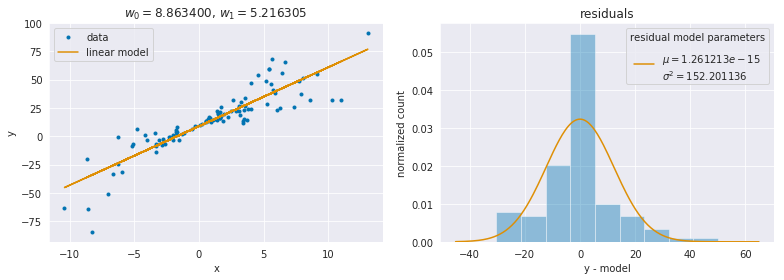

In [2]:
sns.set_style("darkgrid")
sns.set_palette("colorblind")
sns.set_color_codes("colorblind")

data = pd.read_csv("HW0_data.csv")

x, y = data['x'], data['y']
N = len(x)
x = x.values.reshape((N, 1))
y = y.values.reshape((N, 1))

reg = LinearRegression()
reg.fit(x, y)
model = reg.predict(x)

fig, axes = plt.subplots(1, 2, figsize=(11, 4))
model_color = sns.color_palette()[1]

# data and model
axes[0].plot(x, y, '.', label="data")
axes[0].plot(x, model, label="linear model")
axes[0].legend()
# display best fit params w = [w_0, w_1].T
w0, w1 = reg.intercept_[0], reg.coef_[0, 0]
axes[0].set_title(f"$w_0 = {w0:.6f}$, $w_1 = {w1:.6f}$")

# residuals
from scipy.stats import norm
resids = model - y
mu_noise, sigma_noise = norm.fit(resids)
label = f"$\\mu={mu_noise:.6e}$\n$\sigma^2={sigma_noise**2:.6f}$"
sns.distplot(resids, bins=9, fit=norm, kde=False, ax=axes[1], 
             fit_kws={"color":model_color, "label":label})
axes[1].legend(title="residual model parameters")
axes[1].set_title("residuals")

axes[0].set_ylabel('y')
axes[0].set_xlabel('x')
axes[1].set_xlabel("y - model")
axes[1].set_ylabel("normalized count")

fig.tight_layout()

The model only seems to be doing a so-so job of fitting the data. From the plot on the right, the residuals are distributed roughly normally around zero, which is expected from the normal distribution of the noise term $\v\epsilon \sim \mathcal N(0, 0.5)$. Unfortunately though, the variance of the residuals is around 150, or about 300 times larger than the variance of the noise. For this reason, I think that there are probably more appropriate models for the data that can reduce the variance on the distribution of the residuals.

5. **(Uncertainty Quantification)** Compute the 95% [Confidence Interval (CI)](https://stattrek.com/estimation/confidence-interval.aspx) of the parameters you estimated for the dataset in `HW0_data.csv` by bootstrapping (this requires you to access the model parameters of the `LinearRegression` class). How confident are you in the 'correctness' or 'reliability' of your parameter estimates given the CI's?

  Compute the [Predictive Interval (PI)](https://otexts.com/fpp2/prediction-intervals.html) of a single prediction at $x=2$ by bootstrapping. How confident are you in your prediction for $x=2$ given the PI?
  
  *Hint: bootstrapping is the process of (1) generating multiple datasets (with equal size as the training data) that are similarly distributed as your training data by sampling your data with replacement, (2) estimating a quantity of interest repeatedly using these datasets. You can then empirically compute the percentile of interest from the bootstrap estimates of your quanity of interest.* 
  
  *Generating samples from your training data can be done using the `.sample()` function of the `pandas` `DataFrame` class.*
  
  *Computing percentiles of samples can be done using the `.percentile()` function of the `numpy` library.*

Ok, in the code below, the bootstrap loop does the following:

    1. Randomly selects a third of the points (with replacement) from the original data
    2. Minimizes the MSE to compute $w_0$ and $w_1$
    3. Saves those best fit parameters and predicted output given an input for x
    4. Repeats steps 1-3 1,000 times
    
This produces a bootstrapped sample distribution for each parameter and predicted output
that we can compute a confidence interval on with the `get_ci` function.

Finally, we plot the histogram of the sample distributions and accompyaning 95% confidence intervals with `ci_plot`.

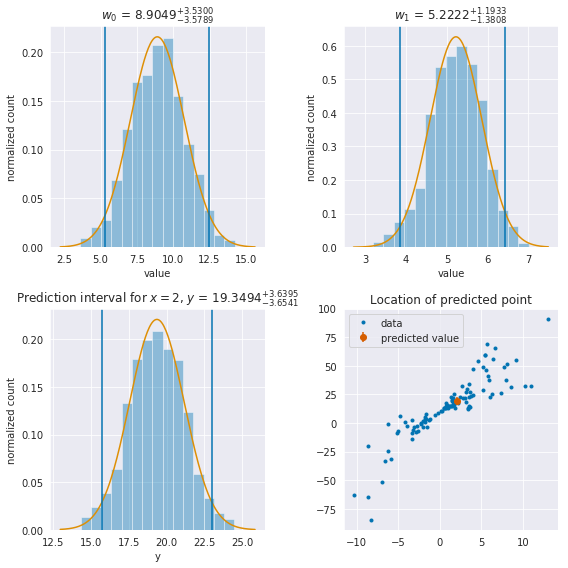

In [3]:
# bootstrap
def get_samples(data, x_pred, iters=1_000):
    w0_samples, w1_samples, y_pred_samples = [], [], []
    for _ in range(iters):
        # sample data
        data_sample = data.sample(len(data) // 3)
        x_sample, y_sample = data_sample['x'], data_sample['y']
        N_sample = len(x_sample)
        x_sample = x_sample.values.reshape((N_sample, 1))
        y_sample = y_sample.values.reshape((N_sample, 1))

        # run regression
        reg_sample = LinearRegression()
        reg_sample.fit(x_sample, y_sample)
        y_pred_sample = reg_sample.predict([[x_pred]])

        # collect best fit params w = [w_0, w_1].T
        w0_sample, w1_sample = reg_sample.intercept_[0], reg_sample.coef_[0, 0]
        w0_samples.append(w0_sample)
        w1_samples.append(w1_sample)

        # collect predicted y value given x_pred. For computing prediction interval
        y_pred_samples.append(y_pred_sample[0][0])
        
    return w0_samples, w1_samples, y_pred_samples

# computes c% confidence interval of dist, default c = 95%
def get_ci(dist, c=95):
    bound = (100 - c) / 2
    mean = np.mean(dist)
    lower, upper = np.percentile(dist, bound), np.percentile(dist, 100 - bound)
    return mean, upper, lower

# plots sample distribution of model parameters
def ci_plot(ax, dist, title="", bins=15, return_ci=False):
    # compute 95% confidence interval of param w_n
    dist_mean, dist_up, dist_down = get_ci(dist)
    dist_u, dist_d = dist_up - dist_mean, dist_mean - dist_down

    # plot
    sns.distplot(dist, fit=norm, fit_kws={"color":model_color}, kde=False, bins=bins, ax=ax)
    ax.axvline(dist_down)
    ax.axvline(dist_up)
    ax.set_xlabel("value")
    ax.set_ylabel("normalized count")
    ax.set_title(f"{title} = ${dist_mean:.4f}^{{+{dist_u:.4f}}}_{{-{dist_d:.4f}}}$")

    if return_ci:
        return ax, dist_mean, dist_u, dist_d
    else:
        return ax

# run bootstrap
x_pred = 2 # Prediction interval will be for this value
w0_samples, w1_samples, y_pred_samples = get_samples(data, x_pred=x_pred, iters=1_000)

# plot
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
samples_list = [w0_samples, w1_samples]
param_names = ["$w_0$", "$w_1$"]
for ax, samples, param_name in zip([axes[0,0], axes[0, 1]], samples_list, param_names):
    ci_plot(ax, samples, title=param_name)
    
title = f"Prediction interval for $x={x_pred}$, $y$"
ax, y_pred, y_pred_u, y_pred_d = ci_plot(axes[1, 0], y_pred_samples, title=title, return_ci=True)
ax.set_xlabel('y')

axes[1, 1].plot(data['x'], data['y'], '.', label="data")
axes[1, 1].errorbar(x_pred, y_pred, yerr=[[y_pred_d], [y_pred_u]], 
                 fmt='o', color='r', label="predicted value")
axes[1, 1].legend()
axes[1, 1].set_title("Location of predicted point")

fig.tight_layout()

The mean of the bootstrapped parameter distrubtions are shown in the title along with the upper and lower 95% confidence intervals (also shown by vertical lines). We can say with 95% confidence that the parameter estimates for $w_0$ and $w_1$ are within the bounds shown above. The slope is also a bit more tightly constrained than the intercept.

The bottom two plots show the distribution of the corresponding predictions for $x=2$ from the sampled data and its Prediction Interval. The 95% confidence interval is shown in the title of the bottom left plot and the corresponding mean value for y is shown in the bottom right plot as a sanity check. It looks to fall within the data very well, including the errorbars which display the Prediction Interval.

Given the CIs, more confident in slope than intercept.

## Part II: Bayesian Linear Regression
### (Material covered in CS109 B or equivalent)
In this problem, your task is to perform Bayesian linear regression on the dataset in `HW0_data.csv`.

Assume that the outcome $y$ can be modeled by the following process:

\begin{aligned}
y &= f(x) + \epsilon = w_1x + w_0 + \epsilon, \quad \epsilon \sim \mathcal{N}(0, 0.5)\\
w_0 &\sim \mathcal{N}(0, 1)\\
w_1 &\sim \mathcal{N}(0, 0.5)
\end{aligned}

In this model, we assume the same likelihood as in Part I, but we also include priors for $w_0$ and $w_1$: $p(w_0) = \mathcal{N}(0, 1)$, $p(w_1) = \mathcal{N}(0, 0.5)$

1. **(Inference)** Analytically derive the joint posterior distribution over the parameters. That is, analytically compute

\begin{aligned}
p(w_1, w_0 | y_1, \ldots y_n, x_1, \ldots, x_n) = \frac{\left(\prod_{n=1}^Np(y_n|x_n, w_1, w_0)\right)p(w_1)p(w_0)}{\prod_{n=1}^Np(y_n|x_n)}.
\end{aligned}

  *Hint: The posterior of a model with a Gaussian (or normal) likelihood and Gaussian priors is yet again Gaussian. This derivation is included in many machine learning textbooks like Machine Learning: a Probabilistic Perspective by Murphy or Pattern Recognition and Machine Learning by Bishop. This derivation also appears online in many course notes - you are welcomed to use any and all available resources.*

To get a handle on the joint posterior distribution, it would help to know what it is shaped like. For that reason I am going to disregard constants of proportionality (like the denominator) and just look at what's left. Subbing in the likelihood distribution we from part 1.2 and the prior distributions above gives us

\begin{align}
    &p(w_1, w_0 | y_1, \ldots y_n, x_1, \ldots, x_n, \sigma^2) \propto
    \left[ \mathcal N(f(x_1), \sigma^2) \times\cdots\times 
    \mathcal N(f(x_n), \sigma^2) \right] \times \mathcal N(0, 0.5) \times \mathcal N(0, 1) \\
    &= \left(\frac{1}{\sqrt{2\pi\sigma^2}}\right)^N
    \left[e^{-\frac{\left(y_1 - w_1x_1 - w_0\right)^2}{2\sigma^2}} \times\cdots\times 
    e^{-\frac{\left(y_n - w_1x_n - w_0\right)^2}{2\sigma^2}}\right]
    \times \frac{1}{\sqrt{2\pi\sigma^2}} e^{-w_1^2/0.5^2}
    \times \frac{1}{\sqrt{2\pi\sigma^2}} e^{-w_0^2} \\
    &= \left(\frac{1}{\sqrt{2\pi\sigma^2}}\right)^{N+2}
    \times e^{-\frac{\sum\left(y_n - w_1x_n - w_0\right)^2}{2\sigma^2}}
    \times e^{-\frac{w_1^2 + w_0^2}{0.5^2}} \quad.
\end{align}

The term on the left and right are constant, leaving the term in the middle, which is a Gaussian. Up to a proportionality constant (and assuming $\sigma$ is known), we have shown that the joint posterior goes like
\begin{align}
    p(w_1, w_0 | y_1, \ldots y_n, x_1, \ldots, x_n, \sigma^2) \propto
    \boxed{e^{-\frac{\sum_n\left(y_n - w_1x_n - w_0\right)^2}{2\sigma^2}}} \quad.
\end{align}

Note: The notation $\sum_n \equiv \sum_{n=1}^N$ was also used here. 

In matrix notation from Murphy, it would be
$\newcommand{\vw}{\boldsymbol{\mathrm{w}}}$
$\newcommand{\vV}{\boldsymbol{\mathrm{V}}}$
$\newcommand{\vI}{\boldsymbol{\mathrm{I}}}$
$\newcommand{\vX}{\boldsymbol{\mathrm{X}}}$
$\newcommand{\vy}{\boldsymbol{\mathrm{y}}}$

\begin{align}
    \boxed{p(\vw | \vy, \vX, \sigma^2) \propto \mathcal N(\vw | \vw _N, \vV_N)} \quad,
\end{align}

where
\begin{align}
    \vw_N &= \vV_N\vV_0^{-1}\vw_0 + \frac{1}{\sigma^2}\vV_N\vX^T\vy \\
    \vV_N^{-1} &= \vV_0^{-1} + \frac{1}{\sigma^2}\vX^T\vX \\
    \vV_N &= \sigma^2\left( \sigma^2\vV_0^{-1} + \vX^T\vX \right)^{-1} \quad.
\end{align}

2. **(Model Interpretation)** Visualize the ***joint posterior*** over the parameters, $p(w_1, w_0 | y, x)$ for the dataset in `HW0_data.csv` (you may use a scatter plot of samples drawn from the posterior or a contour map/heat map of the pdf). In separate plots, visualize the ***marginal posterior*** distribution over each parameter,

\begin{aligned}
p(w_1 | y_1, \ldots y_n, x_1, \ldots, x_n) &= \int_{w_0} p(w_1, w_0 | y_1, \ldots y_n, x_1, \ldots, x_n) dw_0\\
p(w_0 | y_1, \ldots y_n, x_1, \ldots, x_n) &= \int_{w_0} p(w_1, w_0 | y_1, \ldots y_n, x_1, \ldots, x_n) dw_1
\end{aligned}

  Is the information contained in the joint posterior $p(w_1, w_0 | y_1, \ldots y_n, x_1, \ldots, x_n)$ equivalent to the information contained in the two marginals $p(w_1 | y_1, \ldots y_n, x_1, \ldots, x_n), p(w_0 | y_1, \ldots y_n, x_1, \ldots, x_n)$? That is, what does each distribution tell you?

  *Hint: it is not necessary to analytically derive the marginals $p(w_i | y_1, \ldots y_n, x_1, \ldots, x_n)$. Recall that you can perform marginalization of a variable by sampling from the joint distribution and disregarding that variable.*

Text(0, 0.5, '$w_1$')

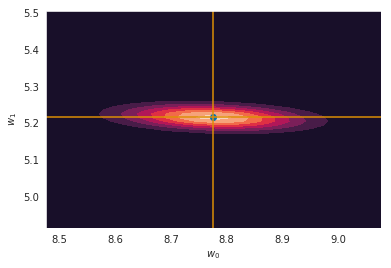

In [4]:
# re-copying data down here for convenience
data = pd.read_csv("HW0_data.csv")
x, y = data['x'], data['y']
N = len(x)
x = x.values.reshape((N, 1))
y = y.values.reshape((N, 1))

# calculate mean and covariance to plug into multivariate Gaussian later
sigma = 1
X = np.hstack((np.ones_like(x), x))
V0 = np.array([[1, 0], [0, 0.5]]) # 2 x 2 covariance matrix
Vn = np.linalg.inv(sigma**2 * (sigma**2 * np.linalg.inv(V0) + X.T@X))
Vn_inv = np.linalg.inv(V0) + (1/sigma**2) * X.T@X # 2 x 2 matrix
w0 = np.array([[0], [0]]) # [[w1], [w2]] mean from given prior
wn = Vn@Vn_inv@w0 + (1/sigma**2) * Vn@X.T@y

# zoom around best fit parameter values
c = 0.3
interval = 0.01
w0s, w1s = np.mgrid[wn[0]-c:wn[0]+c:interval, wn[1]-c:wn[1]+c:interval]
pos = np.dstack((w0s, w1s))

# generate 2D joint posterior
from scipy.stats import multivariate_normal
rv = multivariate_normal(mean=wn.flatten(), cov=Vn)

# plot
fig, ax = plt.subplots()
ax.contourf(w0s, w1s, rv.pdf(pos))
ax.axvline(wn[0], color=model_color)
ax.axhline(wn[1], color=model_color)
ax.scatter(wn[0], wn[1])
ax.set_xlabel("$w_0$")
ax.set_ylabel("$w_1$")

The best fit parameter estimate is also overplotted as a sanity check.

We can visualize the marginal distributions next by just randomly sampling
from our joint posterior and looking at the resulting histogram of each parameter.

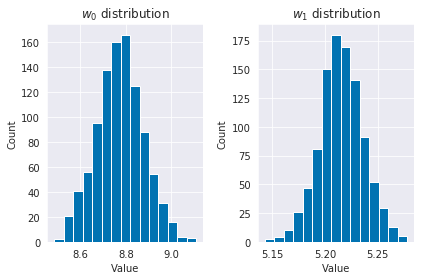

In [5]:
n = 1000 # number of samples to draw
w0_samples_bayes, w1_samples_bayes = np.random.multivariate_normal(wn.flatten(), Vn, n).T

# plot
fig, axes = plt.subplots(1, 2)

axes[0].hist(w0_samples_bayes, bins=15)
axes[0].set_title("$w_0$ distribution")

axes[1].hist(w1_samples_bayes, bins=15)
axes[1].set_title("$w_1$ distribution")

for ax in axes:
    ax.set_xlabel("Value")
    ax.set_ylabel("Count")

fig.tight_layout()

3. **(Prediction)** In Bayesian linear regression, we obtain a distribution over possible parameters given the data, $p(w_1, w_0 | y_1, \ldots y_n, x_1, \ldots, x_n)$, rather than a single ***point-estimate*** of the 'best' parameters. This means that when we predict an outcome for, say, $x=2$ we get a distribution over possible values of $y$ rather than a single $y$. The distribution over the predicted $y$ for a given $x$ is called the ***posterior predictive***, and is denoted $p(y|x)$.

  Visualize the posterior predictive $p(y|x)$ at $x=2$ for the dataset in `HW0_data.csv` as a histogram. 

  *Hint: randomly sample possible parameters from the posterior $p(w_1, w_0 | y_1, \ldots y_n, x_1, \ldots, x_n)$. Each sample represents a linear function $f(x)$. Make a prediction at $x=2$ using each $f(x)$.*

We already have a list of sampled parameters from our joint posterior, and we can visualize prediction interval next by calculating the corresponding predicted values and looking at the resulting histogram.

Text(0.5, 1.0, 'Prediction Distribution')

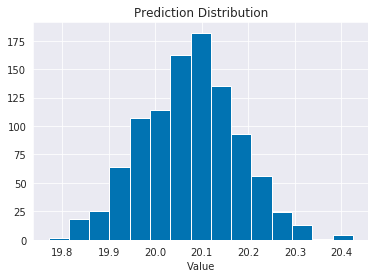

In [6]:
x_pred = 2
noise = np.random.normal(0, np.sqrt(0.5))
pred_bayes = w0_samples_bayes + w1_samples_bayes*x_pred + noise

fig, ax = plt.subplots()
ax.hist(pred_bayes, bins=15)
ax.set_xlabel("Value")
ax.set_title("Prediction Distribution")

## Part III: Comparison

You've now modeled the same set of data using non-Bayesian and Bayesian regression models. In both paradigms it's possible to identify a 'best' set of model parameters (in the non-Bayesian approach, we compute the MLE; in the Bayesian approach, we can compute the mean or mode of the posterior). In both paradigms it is possible to get a sense of the uncertainty we have about our estimates of the parameter and our predictions. 

1. Compute the 95 percentile interval of the marginal posterior distributions $p(w_i | y_1, \ldots y_n, x_1, \ldots, x_n)$  for the dataset in `HW0_data.csv` (you can either do this analytically, or empirically using samples from $p(w_i | y_1, \ldots y_n, x_1, \ldots, x_n)$). Compare these intervals to the CI's you computed in Part I. Which interval is wider? What does this say about the uncertainty of each model over the parameters?

Fitting the previously computed histograms above gives us the following:

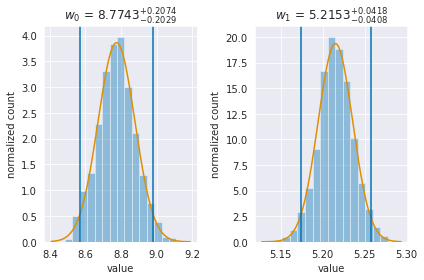

In [7]:
fig, axes = plt.subplots(1, 2)

ci_plot(axes[0], w0_samples_bayes, title="$w_0$")
ci_plot(axes[1], w1_samples_bayes, title="$w_1$")

fig.tight_layout()

The uncertainties for both parametes are much smaller, and again the slope is 
more tightly constrained than intercept.

2. Compute the 95 percentile interval of posterior predictive at $x=2$ for the dataset in `HW0_data.csv` (you can either do this analytically, or empirically using samples from $p(y| x=2)$). Compare this interval to the PI you computed in Part I. Which interval is wider? What does this say about the uncertainty of each model over the prediction?

Fitting the previously computed histogram gives us

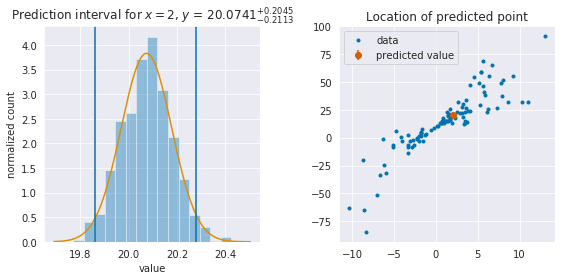

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

title = f"Prediction interval for $x={x_pred}$, $y$"
p_bayes, y_pred, y_pred_u, y_pred_d = ci_plot(axes[0], pred_bayes, title=title, return_ci=True)

axes[1].plot(data['x'], data['y'], '.', label="data")
axes[1].errorbar(x_pred, y_pred, yerr=[[y_pred_d], [y_pred_u]], 
                 fmt='o', color='r', label="predicted value")
axes[1].legend()
axes[1].set_title("Location of predicted point")

fig.tight_layout()

The predicted value is about the same as in the non-Bayesian case, but the uncertainties are much smaller. 

**Extra Credit:** For the maximum likelihood model, visualize the mean prediction and the PI at 100 equally spaced $x$'s (using bootstrap) against the training data. Scatter plot the data; plot the mean prediction as a line; plot the PI as similarly colored shaded region (use the `.fill_between()` function from the `matplotlib`).

For the Bayesian regression model, visualize the posterior mean prediction and the 95 percentile interval of the posterior predictive (you should estimate these quantities empirically). Scatter plot the data; plot the posterior mean prediction as a line; plot the PI as similarly colored shaded region. 

Using these visualizations, make an argument for which model is more appropriate for the model. 

For each model how do your choices (the variance in the likelihood, the priors) affect the model you learn? Given the visualizations, are our choices of the likelihood (and or the priors) appropriate?

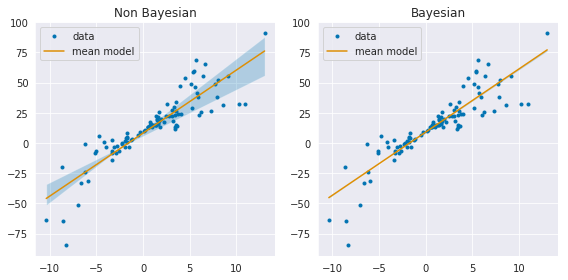

In [9]:
# re-copying data for convenience
x, y = data['x'], data['y']
N = len(x)
x = x.values.reshape((N, 1))
y = y.values.reshape((N, 1))

# sampled xs
N_pred = 100
x_pred_min, x_pred_max = data['x'].min(), data['x'].max()
x_pred = np.linspace(x_pred_min, x_pred_max, N_pred)
#x_pred = x_pred.reshape((N, 1))

#######################
# Non Bayesian
#######################
# predict ys from sampled xs
w0s, w0s_u, w0s_d, =  [], [], []
w1s, w1s_u, w1s_d, =  [], [], []
for xp in x_pred:
    w0_pred_dist, w1_pred_dist, y_pred_dist = get_samples(data, xp, iters=10)
    w0_pred, w0_pred_u, w0_pred_d = get_ci(w0_pred_dist)
    w1_pred, w1_pred_u, w1_pred_d = get_ci(w1_pred_dist)
    
    w0s.append(w0_pred)
    w0s_u.append(w0_pred_u)
    w0s_d.append(w0_pred_d)
    
    w1s.append(w1_pred)
    w1s_u.append(w1_pred_u)
    w1s_d.append(w1_pred_d)

# convert lists to arrays
w0s = np.array(w0s)
w0s_u = np.array(w0s_u)
w0s_d = np.array(w0s_d)
w1s = np.array(w1s)
w1s_u = np.array(w1s_u)
w1s_d = np.array(w1s_d)

# prediction mean model
w0_pred, w1_pred = np.mean(w0s), np.mean(w1s)
noise = np.random.normal(0, np.sqrt(0.5))
model_pred_nonbayes = w0_pred + w1_pred*x_pred + noise
y_pred_u_nonbayes = w0_pred_u + w1_pred_u*x_pred + noise
y_pred_d_nonbayes = w0_pred_d + w1_pred_d*x_pred + noise

#######################
# Bayesian
#######################
# predict ys from sampled xs
w0_mean, w0_mean_u, w0_mean_d = get_ci(w0_samples_bayes)
w1_mean, w1_mean_u, w1_mean_d = get_ci(w1_samples_bayes)

noise = np.random.normal(0, np.sqrt(0.5))
model_pred_bayes = w0_mean + w1_mean*x_pred + noise
y_pred_u_bayes, y_pred_d_bayes = [], []
for xp in x_pred:
    y_pred_u_bayes.append(w0_mean_u + w1_mean_u*xp)
    y_pred_d_bayes.append(w0_mean_d + w1_mean_d*xp)

#######################
# Plot results
#######################
# orignal data and model
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

axes[0].plot(x, y, '.', label="data")
axes[0].plot(x_pred, model_pred_nonbayes, label="mean model") # predicted model
axes[0].fill_between(x_pred, y_pred_d_nonbayes, y_pred_u_nonbayes, alpha=0.25)
axes[0].legend()
axes[0].set_title("Non Bayesian")

# Bayes
axes[1].plot(x, y, '.', label="data")
axes[1].plot(x_pred, model_pred_bayes, label="mean model") # predicted model
axes[1].fill_between(x_pred, y_pred_d_bayes, y_pred_u_bayes, alpha=0.25)
axes[1].legend()
axes[1].set_title("Bayesian")

fig.tight_layout()

Based on thes figures, the Bayesian linear regression seems to be more appropriate for the data based on how much smaller the uncertainties on the mean model are. In reality though, we don't really know how the data was generated so we can't say for sure which regression scheme is more appropriate. 

The Bayesian scheme is very sensitive to the constraints we put on the prior and likelihood. Knowing what we know now, it would be better not to center the parameter priors on zero with such a tight variance.